<a href="https://colab.research.google.com/github/HuynPann511/MACHINE_LEARNING_HK241/blob/main/Practice_Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# predictiction function
def predict(theta_0, theta_1, theta_2, X1, X2):
    return sigmoid(theta_0 + theta_1 * X1 + theta_2 * X2)

# Cost function
def cost_function(Y_true, theta_0, theta_1, theta_2):
    m = len(Y_true)
    Y_predict = predict(theta_0, theta_1, theta_2, X1, X2)
    epsilon = 1e-15
    cost = -(1/m) * np.sum(Y_true * np.log(Y_predict + epsilon) + (1 - Y_true) * np.log(1 - Y_predict + epsilon))

# Add L2 regularization term
    reg_term = (lambda_reg / (2 * m)) * (theta_0**2 + theta_1**2 + theta_2**2)
    cost += reg_term
    return cost

# Gradient descent
def gradient_descent(Y_true, theta_0, theta_1, theta_2, alpha, iterations):
    m = len(Y_true)
    for i in range(iterations):
        Y_predict = predict(theta_0, theta_1, theta_2, X1, X2)
        grad0 = (1/m) * np.sum(Y_predict - Y_true) + (lambda_reg / m) * theta_0
        grad1 = (1/m) * np.sum((Y_predict - Y_true) * X1) + (lambda_reg / m) * theta_1
        grad2 = (1/m) * np.sum((Y_predict - Y_true) * X2) + (lambda_reg / m) * theta_2

        theta_0 -= alpha * grad0
        theta_1 -= alpha * grad1
        theta_2 -= alpha * grad2

    return theta_0, theta_1, theta_2


In [8]:
X1 = np.array([0.245, 0.247, 0.285, 0.299, 0.327, 0.347, 0.356, 0.36, 0.363, 0.364, 0.398, 0.4,
                0.409, 0.421, 0.432, 0.473, 0.509, 0.529, 0.561, 0.569, 0.594, 0.638, 0.656,
                0.816, 0.853, 0.938, 1.036, 1.045])
X2 = X1**2

Y = np.array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

theta_0 = np.random.rand()
theta_1 = np.random.rand()
theta_2 = np.random.rand()

alpha = 1e-4
iterations = 10000
lambda_reg = 1

theta_0 = 0.308811; theta_1 = 0.753729; theta_2 = 0.734725


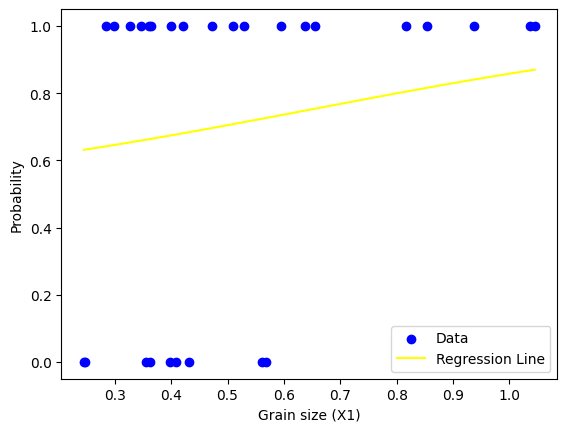

In [11]:
# Train the model
theta_0, theta_1, theta_2 = gradient_descent(Y, theta_0, theta_1, theta_2, alpha, iterations)
print(f"theta_0 = {theta_0:.6f}; theta_1 = {theta_1:.6f}; theta_2 = {theta_2:.6f}")

# Plotting the results
plt.scatter(X1, Y, color='blue', label='Data')
X_values = np.linspace(min(X1), max(X1), 100)
X2_values = X_values**2  # Calculate corresponding X2 values
Y_predict = predict(theta_0, theta_1, theta_2, X_values, X2_values)
plt.plot(X_values, Y_predict, color='yellow', label='Regression Line')

plt.xlabel('Grain size (X1)')
plt.ylabel('Probability')
plt.legend()
plt.show()